# Modelo de Regressão Linear para prever um tipo de vinho com base em algumas características preestabelecidas.

## Introdução

### Importação das bibliotecas para manipulação dos dados

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime

### Importação das bibliotecas para análise e visualização dos dados

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importação das bibliotecas para construção do modelo de machine learning

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression

## Carregamento dos dados

In [14]:
start = datetime.now()

dataset = pd.read_csv(r'dados/wine_dataset.csv')

print(f'Tempo gasto para carregamento do arquivo: {datetime.now() - start}')

Tempo gasto para carregamento do arquivo: 0:00:00.026058


## Análise dos Dados

    Vinhos podem ser distinguidos entre tintos, brancos, espumantes, rosés e doces. Porém aqui neste dataset, 
    serão analizados somente os de estilo tinto e branco.
    Os vinhos brancos e tintos podem ser dividos em três categorias: leve, de corpo médio e os encorpados. 
    Tais categorias dependem de elementos como acidez, densidade, pH, dentre outros. 
    O objetivo da construção do modelo de regressão linear, é que o mesmo aprenda a identificar e prever 
    que estilo de vinho venha a ser, com base em determinadas características informadas, haja vista que 
    o mesmo possuí um background de informações anteriores.

In [24]:
# visualizando algumas informações sobre os dados como quantidade de colunas e linhas, tamanho, etc.

print(f'Quantidade de linhas e colunas:\n {dataset.shape}\n')
print(f'Nome das colunas:\n {dataset.columns}\n')
print('Tipos dos dados e tamanho do arquivo na memória:\n')
dataset.info()
print(f'\nVerificando a existência de dados faltantes:\n {dataset.isnull().sum()}\n')
print('Descrição Estatística dos Dados:\n')
dataset.describe()

Quantidade de linhas e colunas:
 (6497, 13)

Nome das colunas:
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

Tipos dos dados e tamanho do arquivo na memória:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 n

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


    O modelo de regressão linear lida apenas com dados númericos, por isso, 
    na coluna style, vamos classificar o estilo red(tinto) como 0 e o estilo 
    white(branco) como 1.

In [28]:
dataset['style'] = dataset['style'].replace('red', 0)
dataset['style'] = dataset['style'].replace('white', 1)

In [29]:
# feito isto, vamos analisar novamente a descrição estatística dos dados

dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


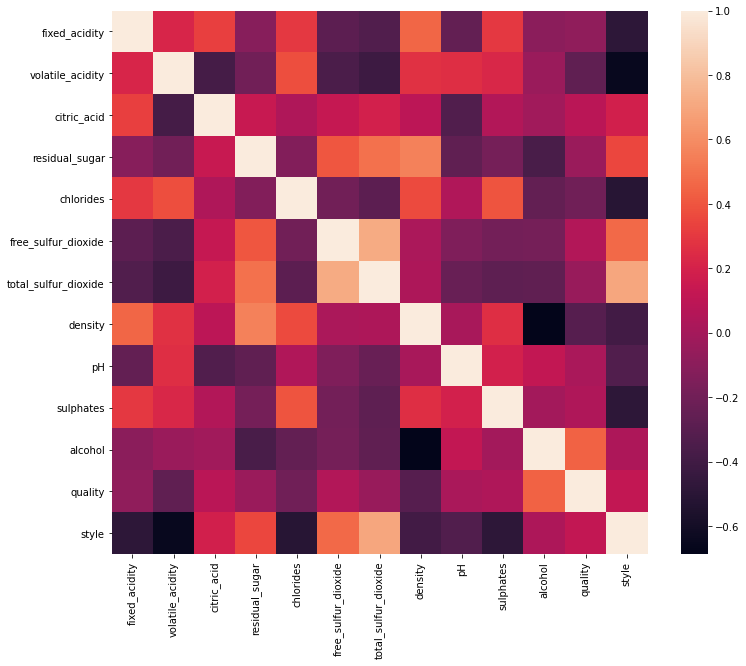

In [39]:
# em um mapa de calor podemos analisar o grau de correlação entre alguns elementos e o estilo do vinho, tinto ou branco.

plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr())

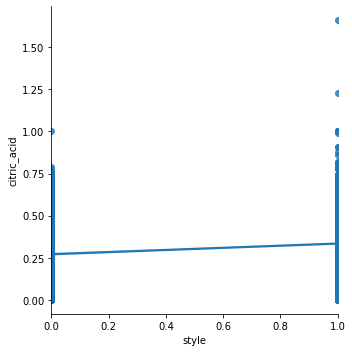

In [40]:
# com base nisso vamos analisar a relação linear entre esses elementos
# ácido cítrico em relação ao estilo

sns.lmplot(x='style', y='citric_acid', data=dataset)

<Figure size 864x720 with 0 Axes>

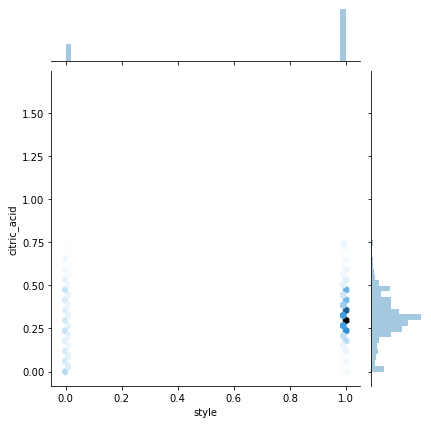

In [43]:
plt.figure(figsize=(12, 10))
sns.jointplot(x='style', y='citric_acid', data=dataset, kind='hex')

O percentual de ácido cítrico nos vinhos brancos parece ser maior

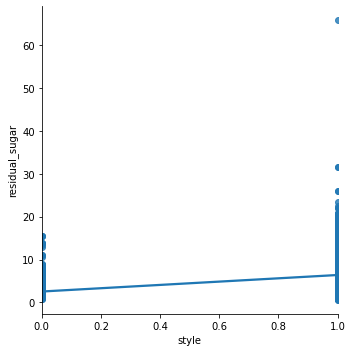

In [48]:
# total de residual de açucar em relação ao estilo

sns.lmplot(x='style', y='residual_sugar', data=dataset)

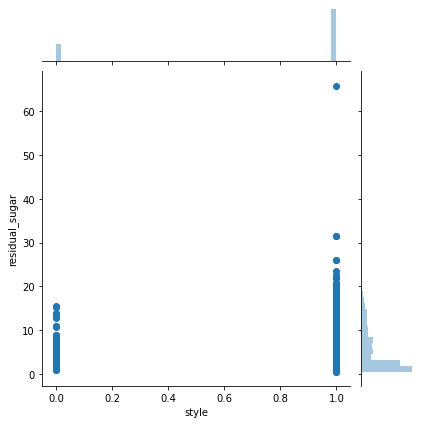

In [49]:
sns.jointplot(x='style', y='residual_sugar', data=dataset)

O vinho branco parece ter um residual de açucar maior 

#### Separando as variáveis para construção do modelo

In [55]:
# vamos separar as variáveis em variável alvo que é qual queremos fazer prever

y = dataset['style']

In [56]:
# variáves preditoras, as que serão determinantes para previsão do alvo
# primeiro vamos trabalhar com todas as varíaveis do dataset com exceção da variável style

X = dataset.drop('style', axis=1)

In [57]:
# separando o conjunto de dados em dados de treino e teste de 70% para treino e 30% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

In [59]:
# construíndo o modelo de machine learning

modelo = ExtraTreesClassifier()

modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [75]:
nivel_acerto = modelo.score(X_teste, y_teste)

print(f'Acurácia: {nivel_acerto:.4f}%')

Acurácia: 0.9969%


In [76]:
# coletando 5 amostras de dados de teste

X_teste[250:255]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5716,6.2,0.35,0.20,18.1,0.069,33.0,158.0,0.99908,3.15,0.50,8.8,6
1679,6.8,0.22,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.6,6
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6
2996,7.3,0.25,0.36,13.1,0.050,35.0,200.0,0.99860,3.04,0.46,8.9,7
5437,6.5,0.41,0.22,4.8,0.052,49.0,142.0,0.99460,3.14,0.62,9.2,5


In [77]:
y_teste[250:255]

5716    1
1679    1
568     0
2996    1
5437    1
Name: style, dtype: int64

In [89]:
# fazendo previsões

previsoes = modelo.predict(X_teste[250:255])

print(f'Previsões: {previsoes}')

Previsões: [1 1 0 1 1]


Se compararmos as predições com as amostras de teste, o modelo acertou em 100%

## Testando outro algoritmo 

In [79]:
modelo2 = LinearRegression()

modelo2.fit(X_treino, y_treino)

LinearRegression()

In [80]:
# verificando o nível de acerto

nivel_acerto = modelo2.score(X_teste, y_teste)

print(f'Acurácia: {nivel_acerto:.4f}%')

Acurácia: 0.8606%


In [81]:
# coletando outras amostras de teste

X_teste[600:603]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5147,6.2,0.47,0.19,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.3,6
4978,7.6,0.36,0.49,11.3,0.046,87.0,221.0,0.99840,3.01,0.43,9.2,5
6260,8.0,0.23,0.41,1.1,0.048,35.0,150.0,0.99168,3.09,0.47,11.2,5


In [82]:
y_teste[600:603]

5147    1
4978    1
6260    1
Name: style, dtype: int64

In [88]:
# fazendo as previsões

previsoes = modelo2.predict(X_teste[600:603])

print(f'Previsões: {previsoes}')

Previsões: [1.04906503 0.9093258  1.04633856]
